In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
# matplotlib.rcParams['figure.dpi'] = 80
# matplotlib.rcParams['figure.figsize'] =[14, 6]
# matplotlib.rcParams['axes.grid'] = True

In [2]:
%load_ext autoreload
%autoreload 2

import sys
print(sys.version_info)

import sys
sys.path.insert(0, '../')


import numpy as np
import matplotlib.pyplot as plt

from lib_data import *

import random

from tqdm import tqdm
from lib_lsh import *

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)


In [3]:
load_workspace(vars(), filename='data/25shot_may18')
load_workspace(vars(), filename='data/20200619-172822-lsh-hardware-g-5-qs_hash')

Loaded: mem_vals, mem_keys, x, y, x_new, y_new, qs, qs_new, 
Loaded: In, Out, mem_vals, mem_keys, x, y, x_new, y_new, qs, qs_new, hash_planes, hash_key, y_true, y_preds, i, qq, yy, q_hash, distance, g, q, qs_input, rand_vecs, vec_pos, vec_neg, out_pos, out_neg, output, g_true, output_soft, output_soft2, c, lin_cor_lsh, output_cor, qs_hash_new, qs_hash, 


/Users/canli/.virtualenvs/py37/lib/python3.7/site-packages/dill/_dill.py:472: UserWarning: This figure was saved with matplotlib version 3.1.1 and is unlikely to function correctly.
  obj = StockUnpickler.load(self)


The data of this notebook is presented in 

## Conductance

In [4]:
plt.imshow(g*1e6)
plt.colorbar()
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

In [5]:
plt.figure(figsize=(3.5, 3))
plt.xlabel('Conductance ($\mu$S)')
plt.ylabel('Count')
plt.grid(True, alpha=.3)

plt.hist(g.reshape(-1)*1e6, 50)
plt.xlim(0, 100)


(0.0, 100.0)

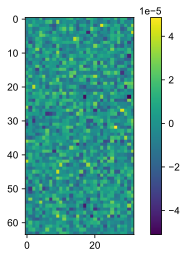

In [6]:
g_diff = g[:,::2] - g[:,1::2]

plt.imshow(g_diff); plt.colorbar()

In [7]:
plt.figure(figsize=(3.5, 3))
plt.xlabel('Conductance ($\mu$S)')
plt.ylabel('Count')
plt.grid(True, alpha=.3)

plt.hist(g_diff.reshape(-1)*1e6, 50)
plt.xlim(-50, 50)

(-50.0, 50.0)

# Load the simulation data

In [12]:
load_workspace(vars(), filename='data/20200705-180103-load_25shot_60_data')

Loaded: In, Out, mem_vals, mem_keys, x, y, x_new, y_new, qs, qs_new, yt, y_idx, y_sorted, x_sorted, figi, r, c, i, y_true, y_preds, qq, yy, normalized_query, similarities, vec, matrix, hash_planes, hash_key, d_list, q_hash, distance, acc_list, n_bit_list, n_bit, accs, acc, acc_list2, 


In [16]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
# matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['figure.figsize'] = [5, 4]
matplotlib.rcParams['axes.grid'] = True

In [17]:
for acc in acc_list.T:
    plt.plot(n_bit_list, acc, '.', color='black', alpha=0.1)
    
plt.plot(n_bit_list, [0.968 for _ in n_bit_list], '--')

# plt.plot(32, 0.683, 'o', ms=10, label='VMM with readout matrix')
# plt.plot(32, 0.701, 'o', ms=10, label='Hardware VMM')

plt.plot(32, 0.86, 'o', ms=10, label='Software Hamming with hardware LSH')
# plt.plot(32, 0.808, 'o', ms=10, label='Hardware hamming and LSH')


plt.xscale('log')
_ = plt.xticks(n_bit_list, n_bit_list)

plt.ylabel('Accuacy')
plt.xlabel('# of LSH bits')

plt.legend()

In [18]:
acc_list2 = np.array(acc_list2)


for acc in acc_list2.T:
    plt.plot(n_bit_list, acc, '.', color='black', alpha=0.1)
    
# plt.plot(n_bit_list, [0.968 for _ in n_bit_list], '--')

plt.plot(32, 0.895, 'o', ms=10, label='Software Hamming with hardware LSH')
# plt.plot(32, 0.895, 'o', ms=10, label='Hardware hamming and LSH')

plt.xscale('log')
_ = plt.xticks(n_bit_list, n_bit_list)

plt.ylabel('Accuacy')
plt.xlabel('# of LSH bits')

plt.legend()

# Load Hamming data

In [19]:
load_workspace(vars(), filename='data/20200620-152651-tcam_experiment_0620n-2')

/Users/canli/.virtualenvs/py37/lib/python3.7/site-packages/dill/_dill.py:472: UserWarning: This figure was saved with matplotlib version 3.1.1 and is unlikely to function correctly.
  obj = StockUnpickler.load(self)


ImportError: cannot import name 'WinDLL' from 'ctypes' (/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/ctypes/__init__.py)